#**Expository Writing**

##Research Topic:
#**"Comparative Analysis of Machine Learning Models for Predicting Stress Levels among Undergraduate Students at NUST, Pakistan"**

##**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

##**Loading the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv("StressLevelDataset.csv")
print(df.head())
print(df.shape)

   Age  Gender                   Discipline_Sector  Personality_Type  \
0   19  Female  Medical Sciences and Health Sector               0.0   
1   19  Female  Medical Sciences and Health Sector               0.5   
2   23  Female          Engineering and Technology               0.5   
3   20  Female                    Natural Sciences               0.5   
4   19  Female          Engineering and Technology               0.0   

   Is_Hostellite  Diet_Quality  Financial_Condition  Family_Support  \
0              0             2                    5               5   
1              0             3                    4               4   
2              0             3                    3               5   
3              1             2                    3               5   
4              0             5                    4               5   

   Side_Hustle  Study_Load  ...  Socially_Isolated  Social_Media_Usage  \
0            0           4  ...                  5                

##**Handling Missing Values**

In [3]:
# Drop rows with missing values
df = df.dropna()
print(df.shape)

(212, 34)


##**Describe Data**

In [4]:
print(df.describe())

              Age  Personality_Type  Is_Hostellite  Diet_Quality  \
count  212.000000        212.000000     212.000000    212.000000   
mean    21.169811          0.382075       0.603774      2.485849   
std      2.046714          0.308274       0.490270      0.956290   
min     18.000000          0.000000       0.000000      1.000000   
25%     20.000000          0.000000       0.000000      2.000000   
50%     21.000000          0.500000       1.000000      2.000000   
75%     22.000000          0.500000       1.000000      3.000000   
max     29.000000          1.000000       1.000000      5.000000   

       Financial_Condition  Family_Support  Side_Hustle  Study_Load  \
count           212.000000      212.000000   212.000000  212.000000   
mean              3.594340        4.433962     0.245283    3.962264   
std               1.004995        0.908296     0.431273    0.907311   
min               1.000000        1.000000     0.000000    1.000000   
25%               3.000000      

##**Information and Shape of Data**

In [5]:
print(df.info)

<bound method DataFrame.info of      Age  Gender                   Discipline_Sector  Personality_Type  \
0     19  Female  Medical Sciences and Health Sector               0.0   
1     19  Female  Medical Sciences and Health Sector               0.5   
2     23  Female          Engineering and Technology               0.5   
3     20  Female                    Natural Sciences               0.5   
4     19  Female          Engineering and Technology               0.0   
..   ...     ...                                 ...               ...   
207   22    Male          Engineering and Technology               0.5   
208   24  Female       Humanities and Social Science               0.5   
209   25  Female       Humanities and Social Science               0.5   
210   28  Female       Humanities and Social Science               0.5   
211   19    Male          Engineering and Technology               1.0   

     Is_Hostellite  Diet_Quality  Financial_Condition  Family_Support  \
0     

##**One-hot Encoding, Distribution of Data & Train-Test Split**

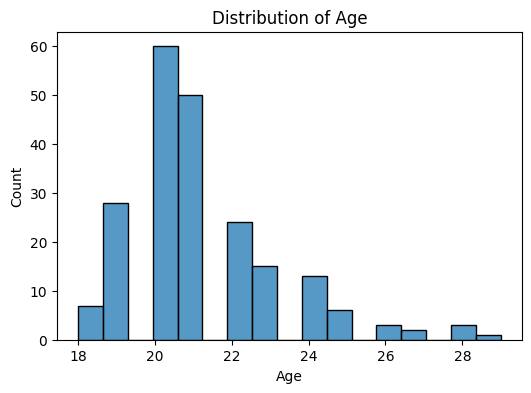

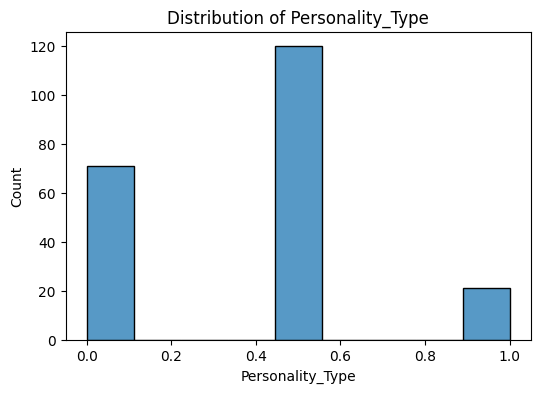

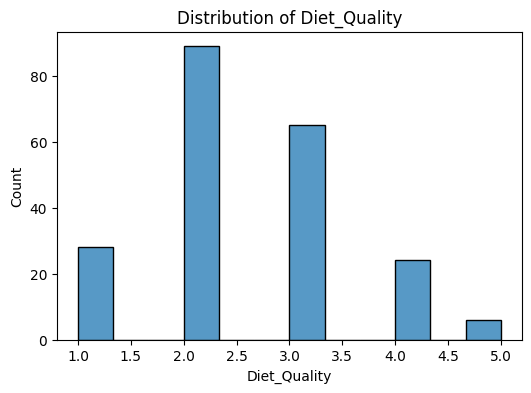

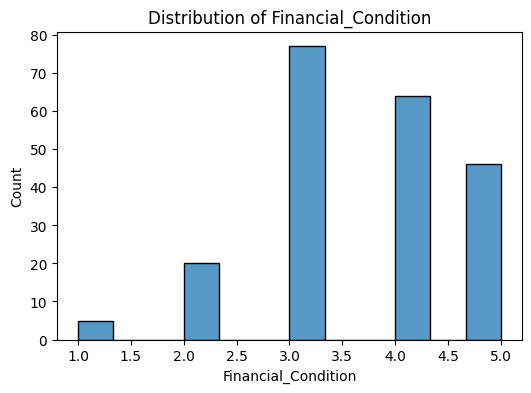

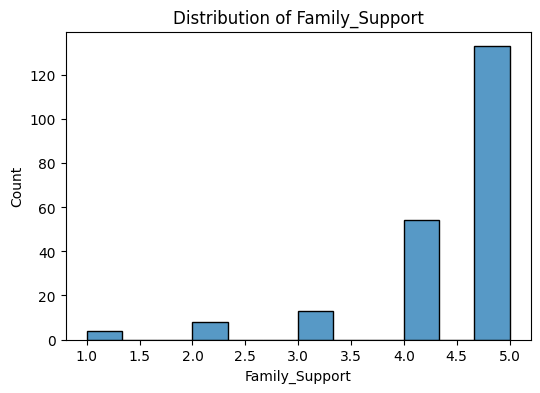

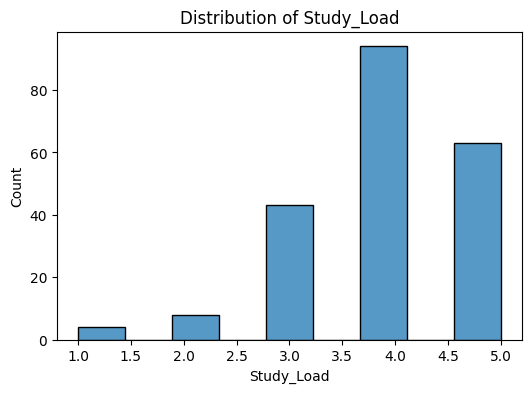

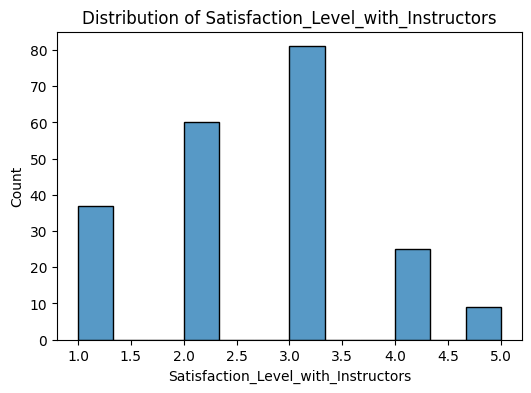

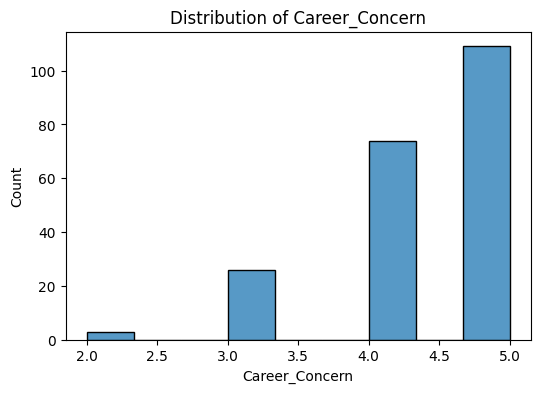

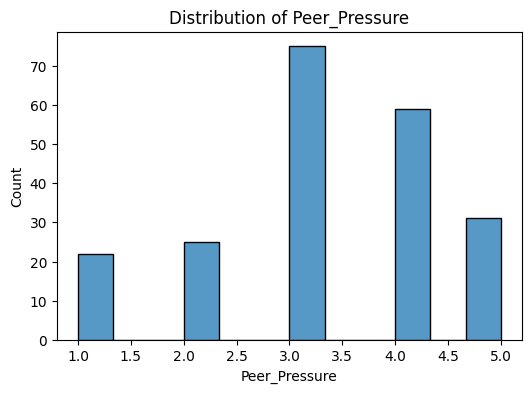

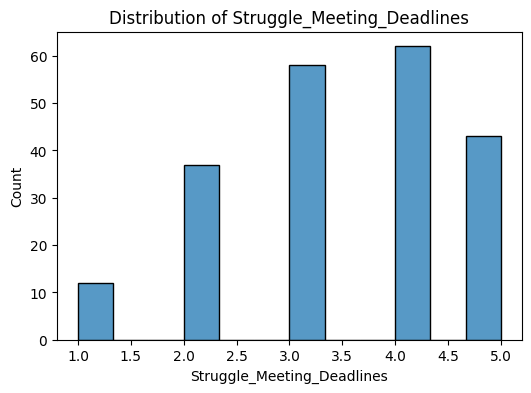

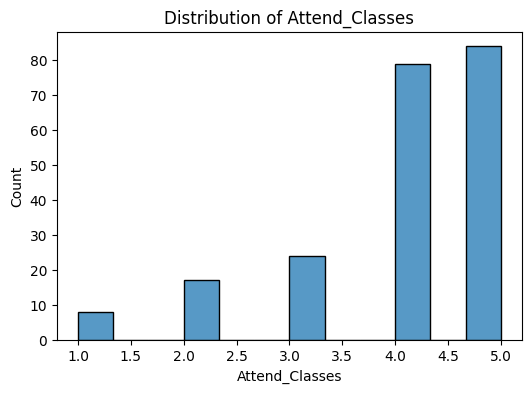

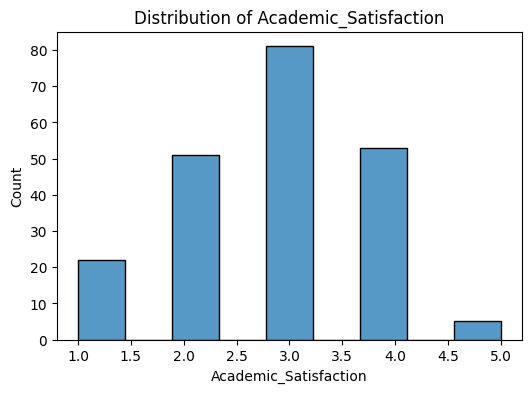

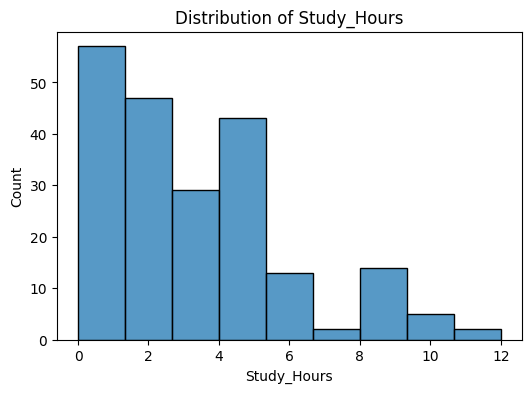

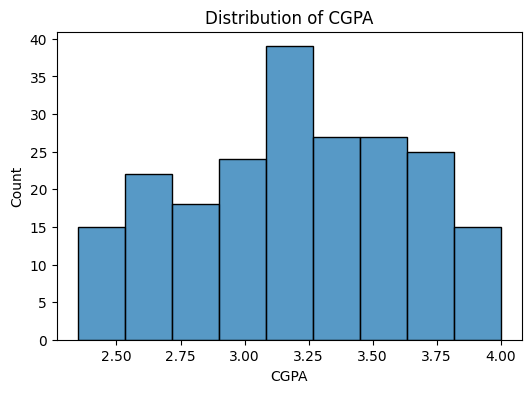

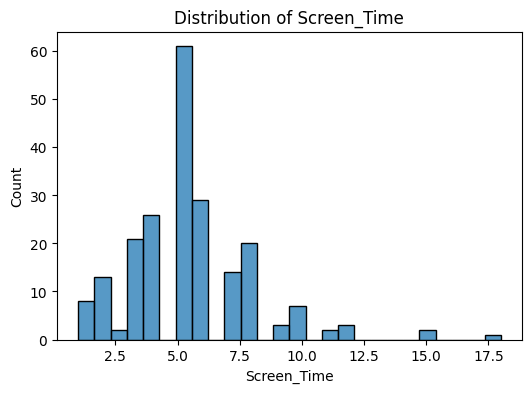

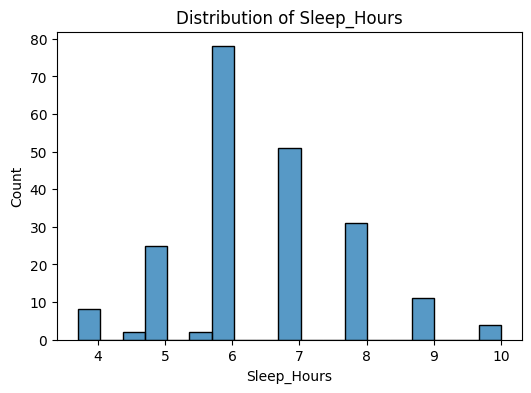

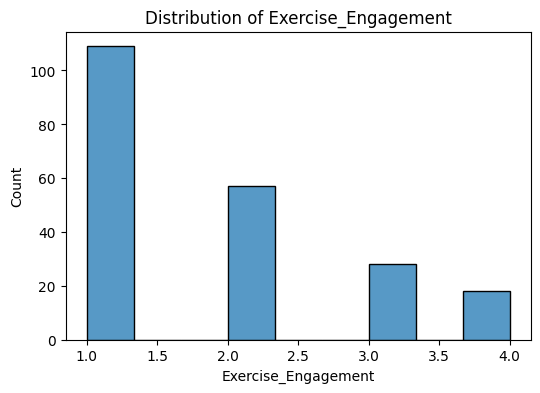

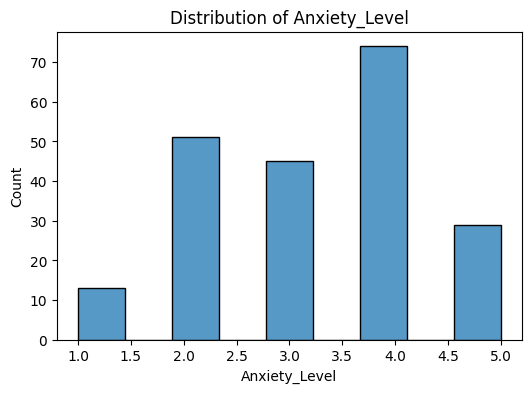

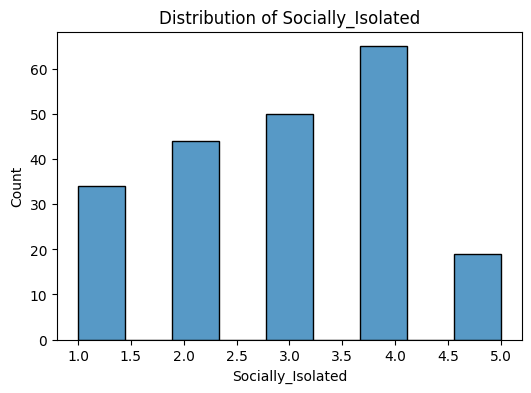

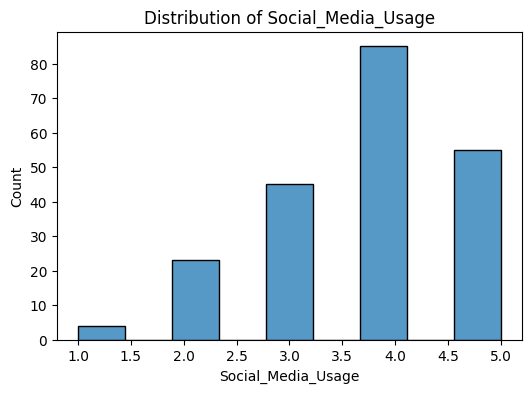

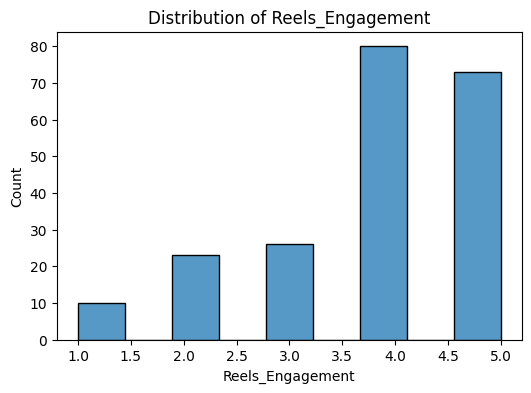

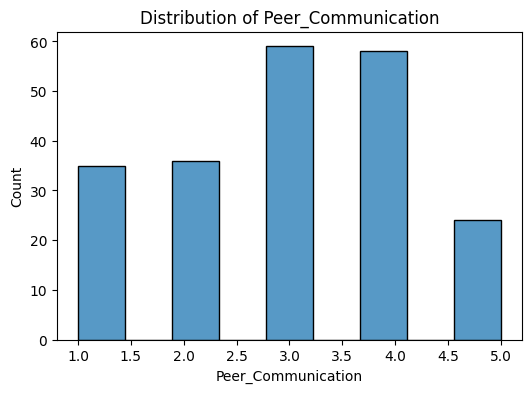

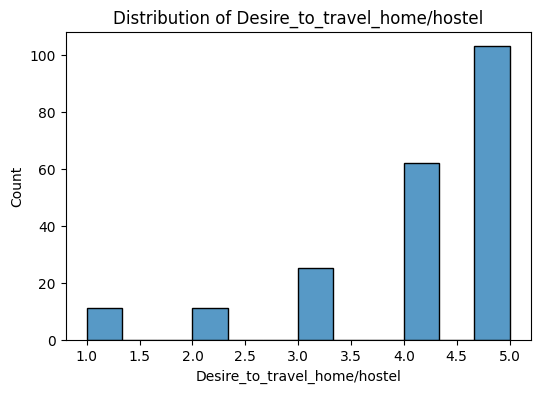

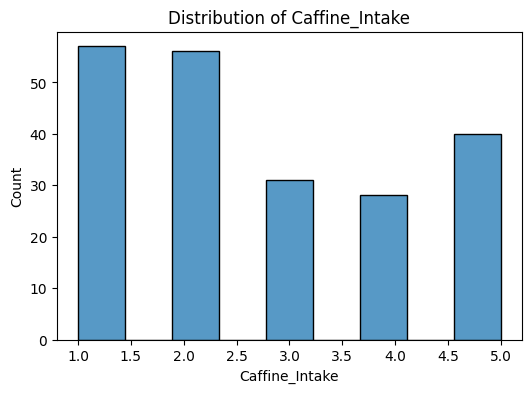

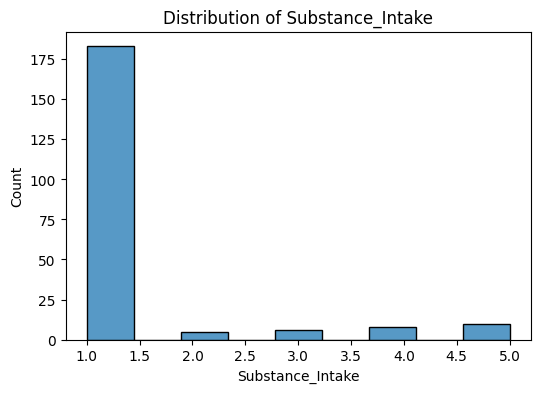

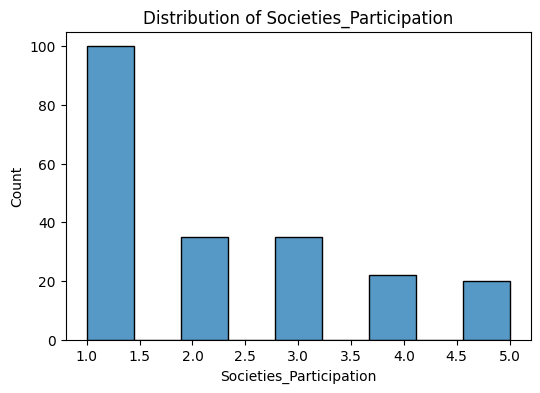

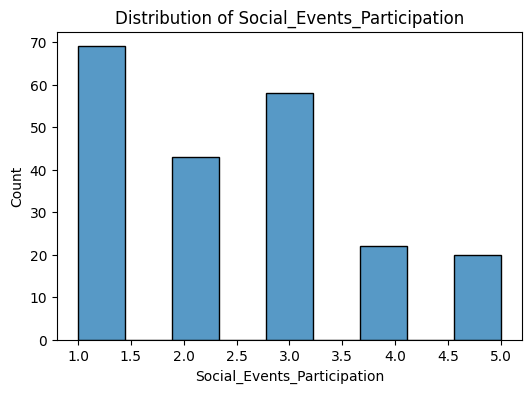

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop(columns=["Stress_Level"])
y = df_encoded["Stress_Level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

numerical_cols = ['Age', 'Personality_Type', 'Diet_Quality', 'Financial_Condition', 'Family_Support', 'Study_Load',
                 'Satisfaction_Level_with_Instructors', 'Career_Concern', 'Peer_Pressure', 'Struggle_Meeting_Deadlines',
                 'Attend_Classes', 'Academic_Satisfaction', 'Study_Hours', 'CGPA', 'Screen_Time', 'Sleep_Hours',
                 'Exercise_Engagement', 'Anxiety_Level', 'Socially_Isolated', 'Social_Media_Usage', 'Reels_Engagement',
                 'Peer_Communication', 'Desire_to_travel_home/hostel', 'Caffine_Intake', 'Substance_Intake',
                 'Societies_Participation', 'Social_Events_Participation']

# Data Distribution Visualization
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


##**Correlation Matrix**

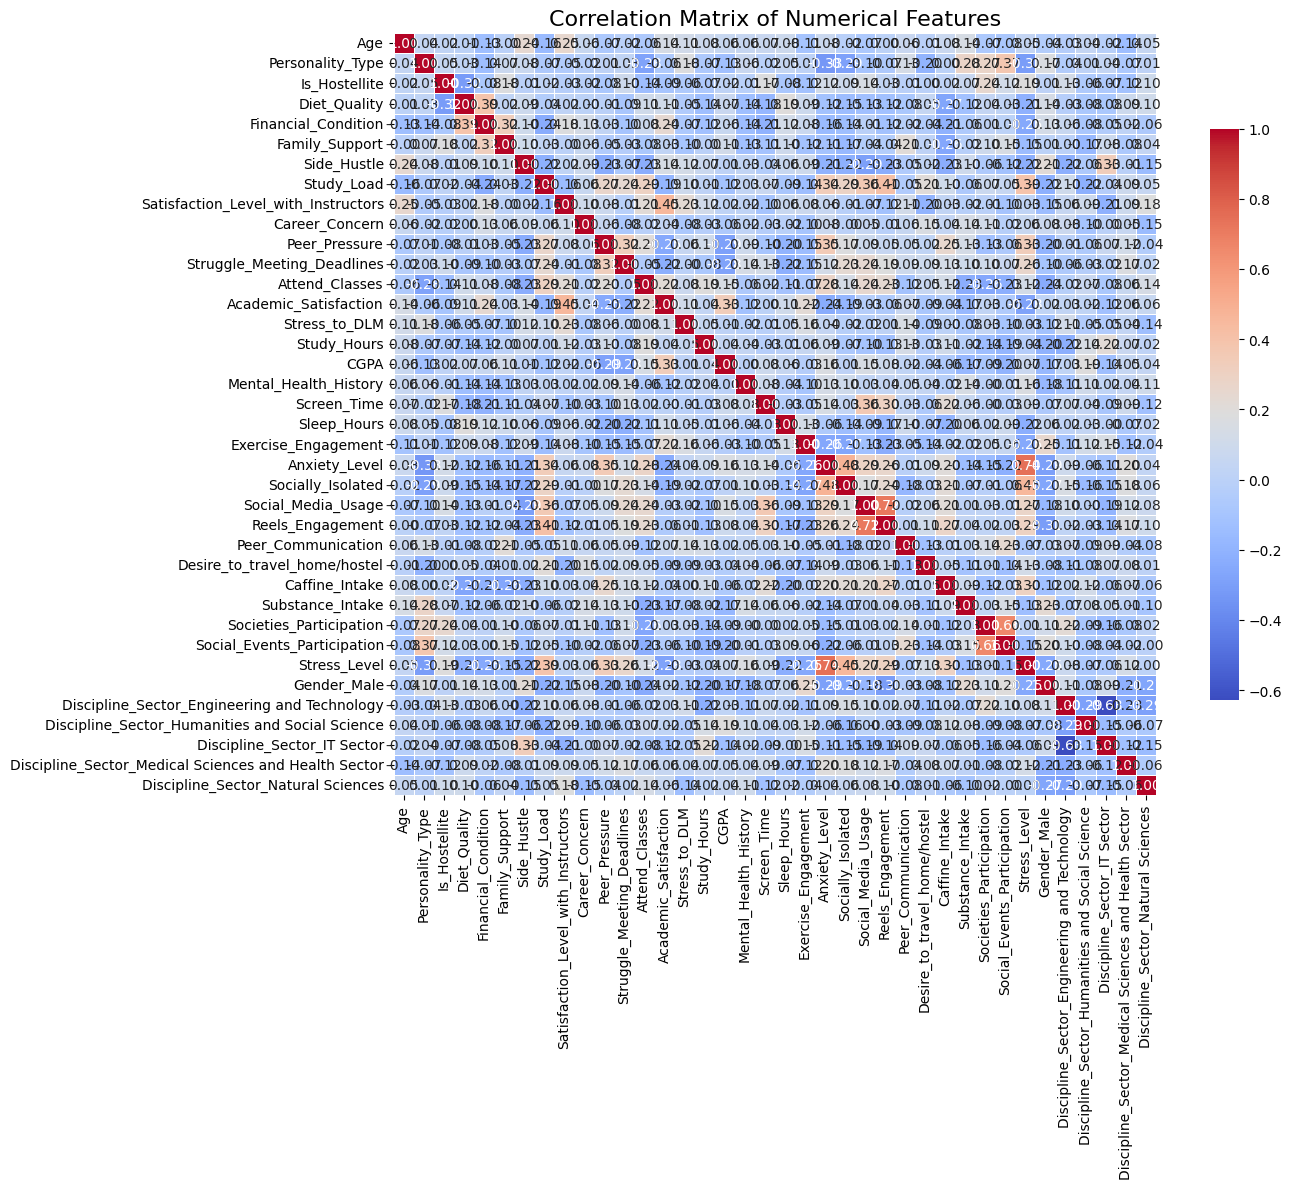

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix on numeric columns only
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .75}, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##**Implementing Models**

In [8]:
results = {}

# Applying SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# 1. XGBoost with SMOTE
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(X_res, y_res)
y_pred_xgb = xgb.predict(X_test_scaled)
results["XGBoost with SMOTE"] = accuracy_score(y_test, y_pred_xgb) * 100

# 2. SVM with SMOTE
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)
svm = SVC(kernel='linear')
svm.fit(X_res, y_res)
y_pred_svm = svm.predict(X_test_scaled)
results["SVM with SMOTE"] = accuracy_score(y_test, y_pred_svm) * 100

# 3. Random Forest without SMOTE
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
results["Random Forest without SMOTE"] = accuracy_score(y_test, y_pred_rf) * 100

# 4. KNN without SMOTE
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
results["KNN without SMOTE"] = accuracy_score(y_test, y_pred_knn) * 100

# 5. Logistic Regression with SMOTE
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_res, y_res)
y_pred_logreg = logreg.predict(X_test_scaled)
results["Logistic Regression with SMOTE"] = accuracy_score(y_test, y_pred_logreg) * 100

# Display Results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy (%)"])
print(results_df.sort_values(by="Accuracy (%)", ascending=False).to_string(index=False))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:49:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                         Model  Accuracy (%)
Logistic Regression with SMOTE     97.297297
   Random Forest without SMOTE     89.189189
                SVM with SMOTE     89.189189
            XGBoost with SMOTE     86.486486
             KNN without SMOTE     83.783784


##**Visualizing Feature Importance**

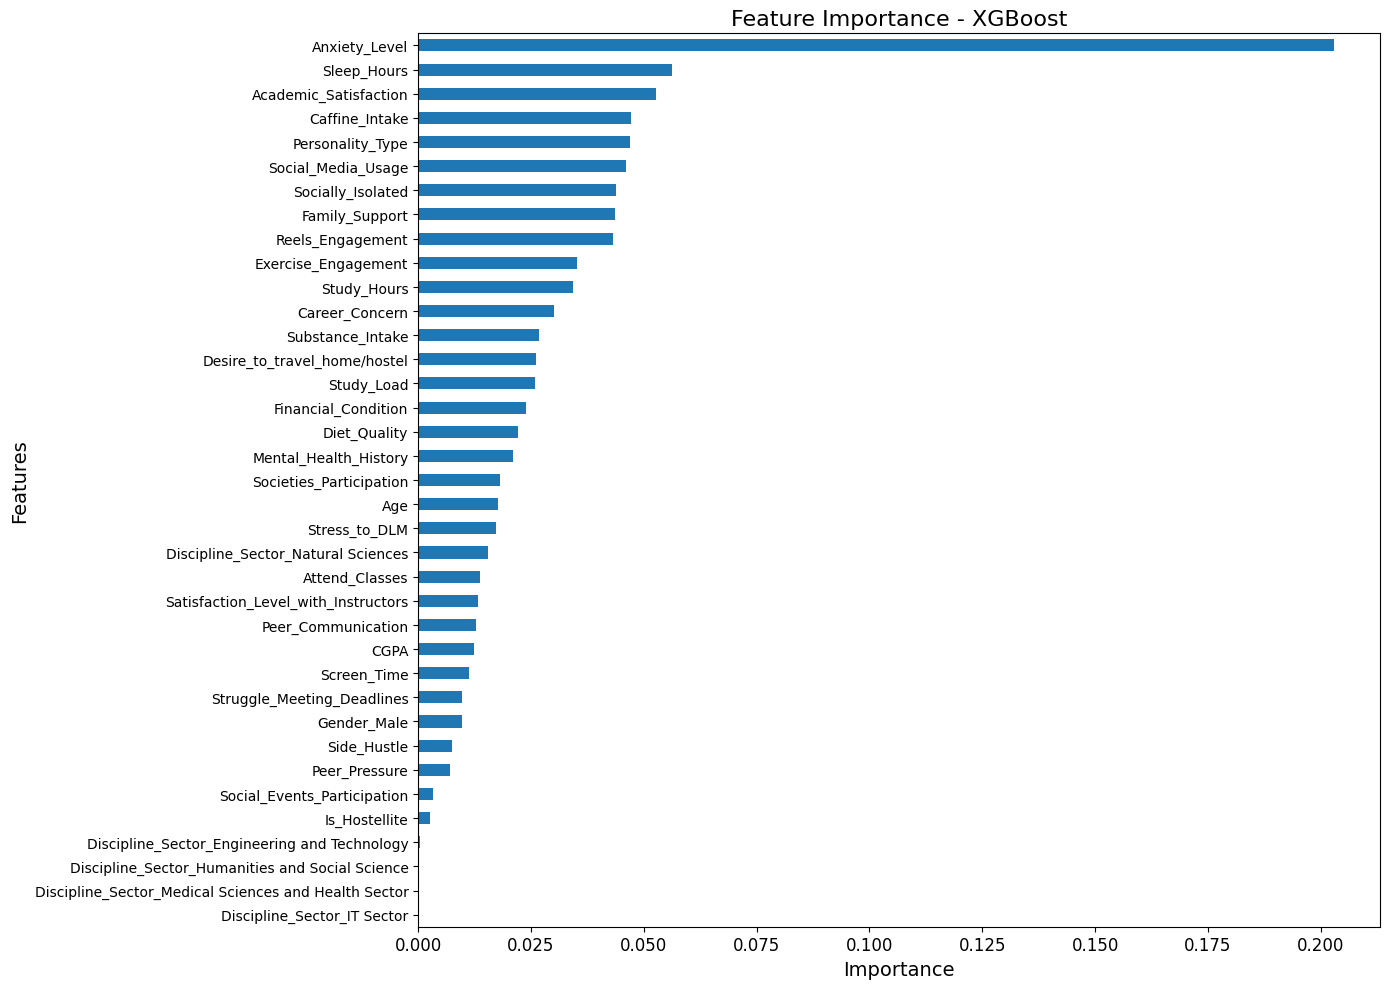

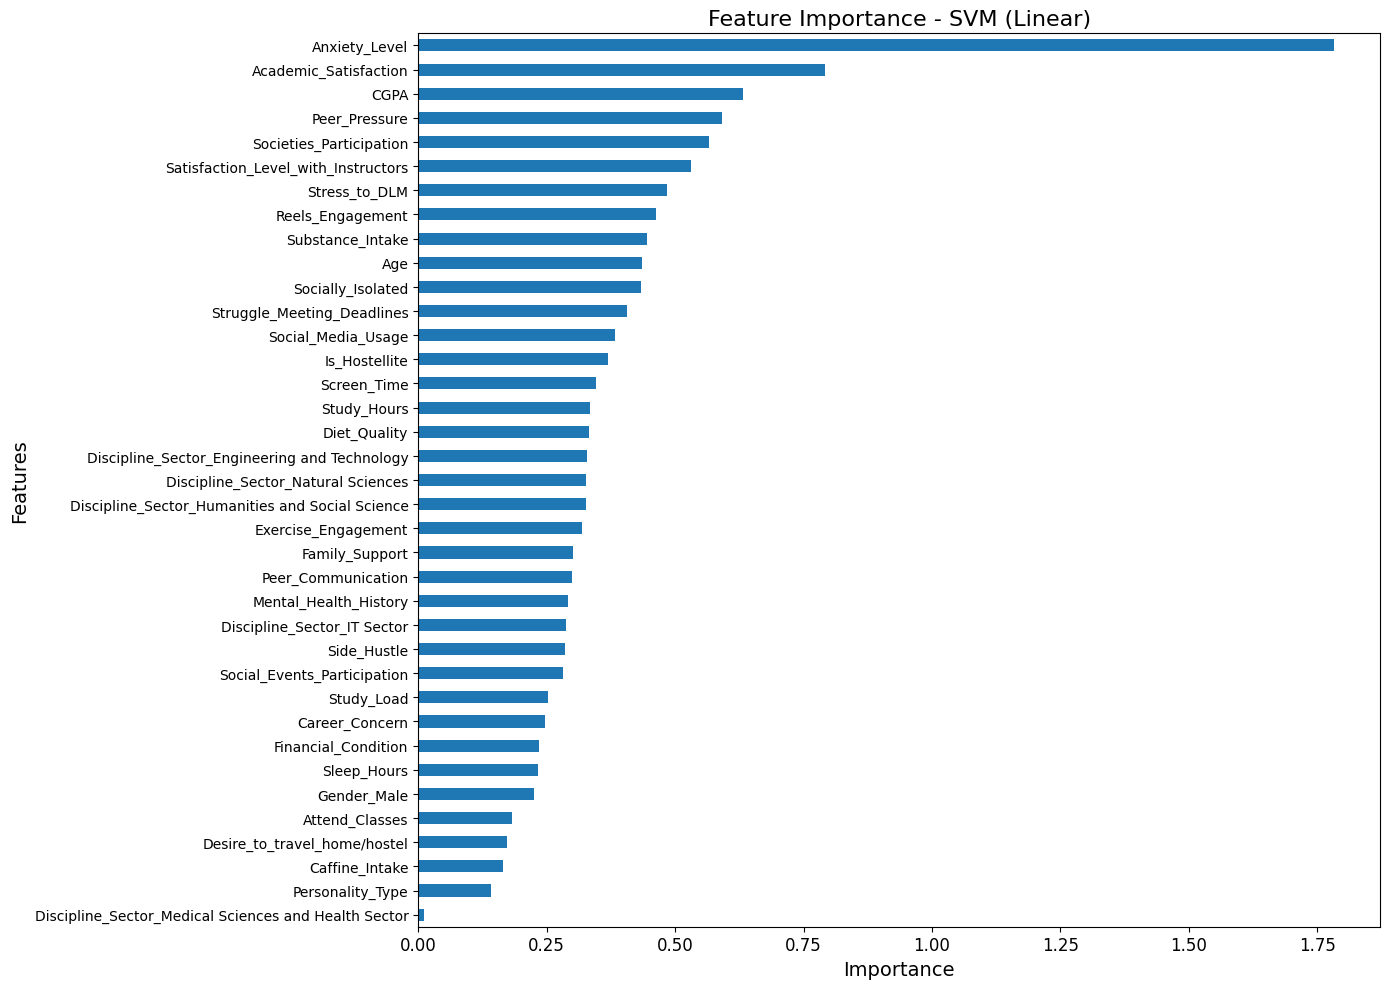

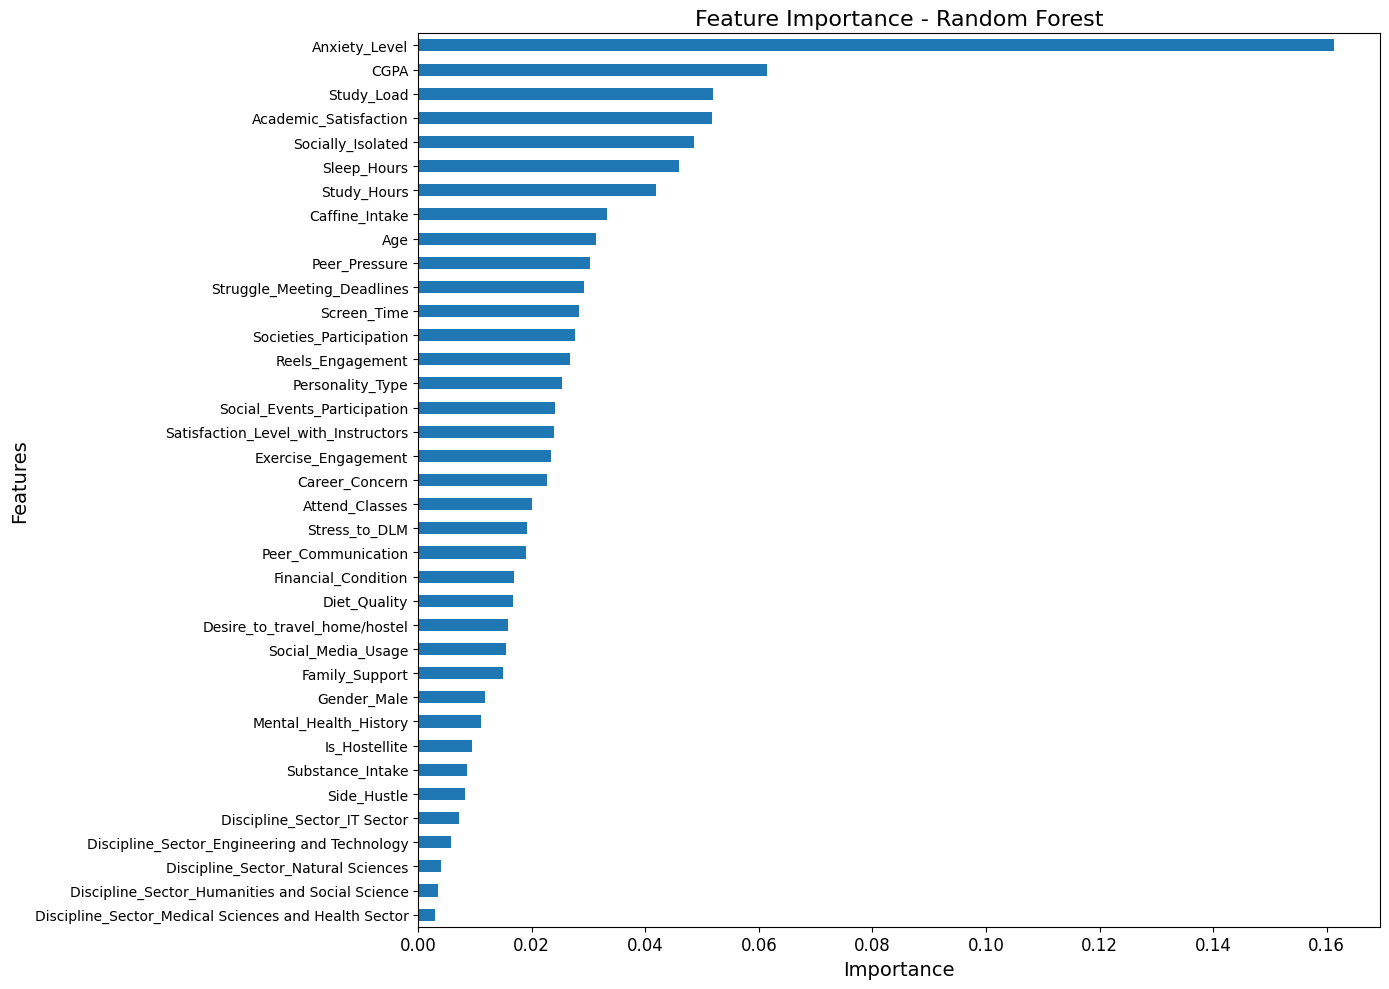

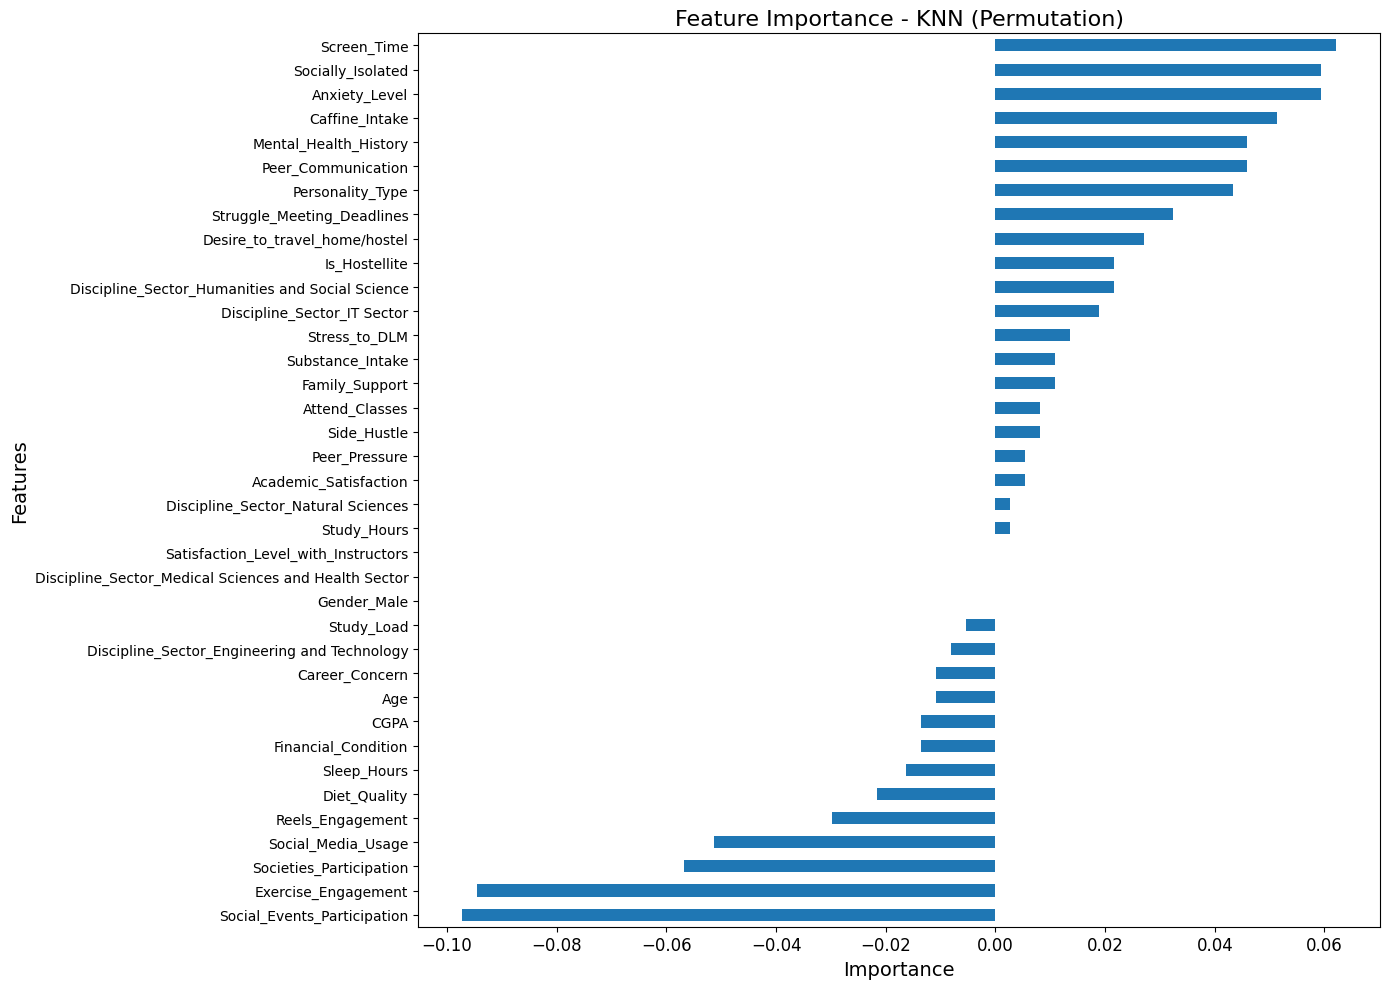

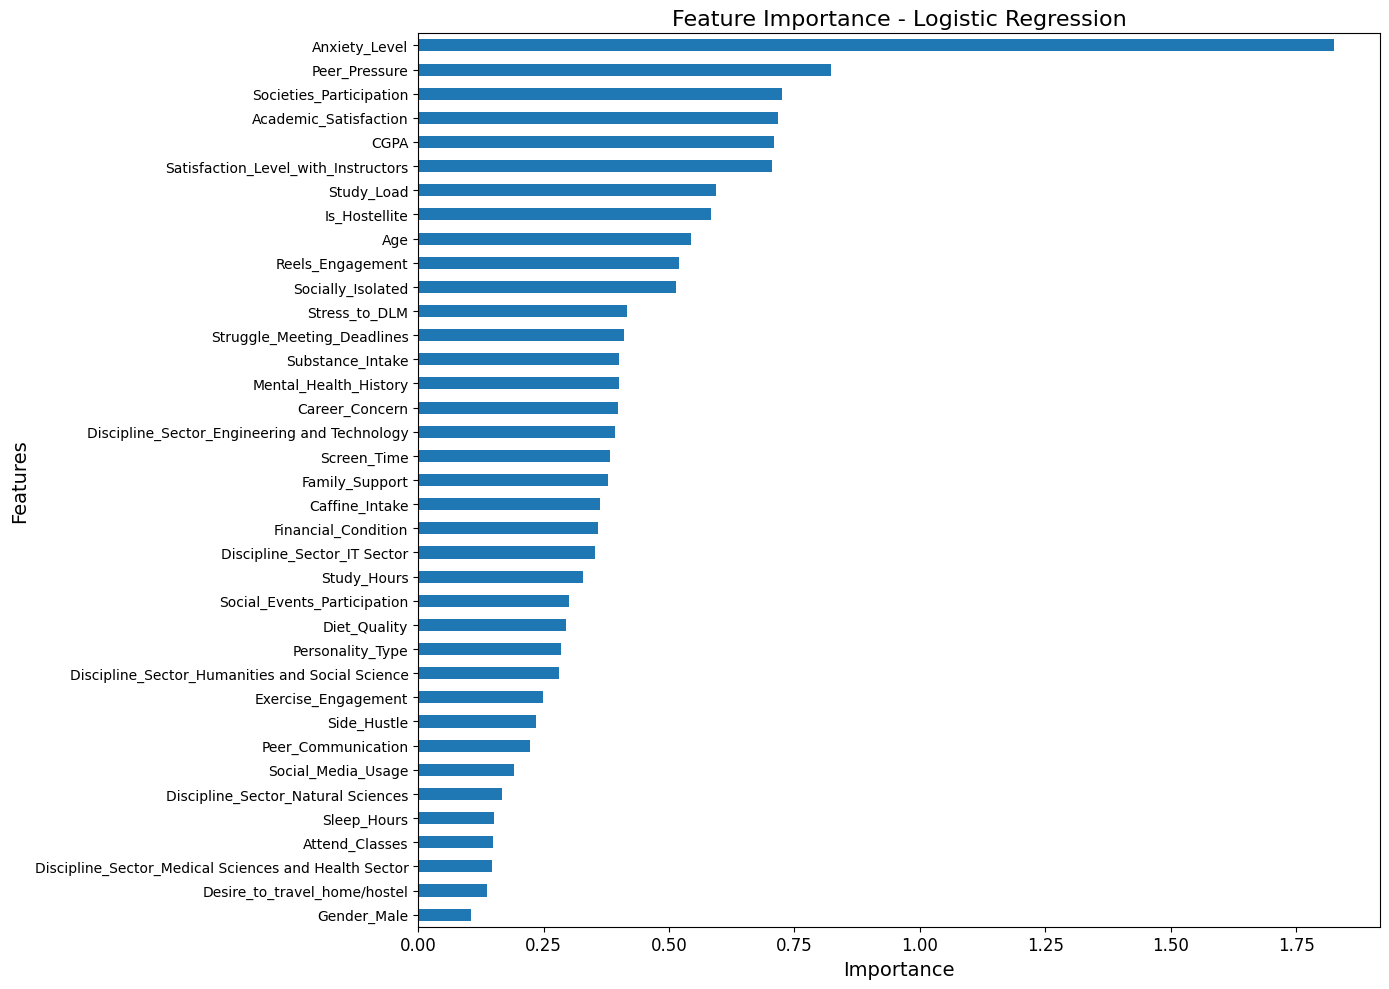

In [9]:
from sklearn.inspection import permutation_importance

# Get feature names
feature_names = X.columns

# Prepare importances
model_importances = [
    ("XGBoost", xgb.feature_importances_),
    ("SVM (Linear)", np.abs(svm.coef_).mean(axis=0)),  # Mean across classes
    ("Random Forest", rf.feature_importances_),
    ("KNN (Permutation)", permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42).importances_mean),
    ("Logistic Regression", np.abs(logreg.coef_).mean(axis=0))
]

# Plotting each model’s feature importance
for model_name, importance_values in model_importances:
    importances = pd.Series(importance_values, index=feature_names)
    importances = importances.sort_values()

    plt.figure(figsize=(14, 10))
    importances.plot(kind='barh')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.title(f'Feature Importance - {model_name}', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
